# Capstone Project: Social media sentiment analysis
## Part 4: Samsung YouTube advertisement

In [7]:
# Import libraries
import requests
import json
import pandas as pd
import numpy as np
import re

from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# API Keys

In [240]:
# YouTube API key
API_KEY_YT="AIzaSyAvs49F4Xv25mFzdDZPsiU4cBosm8T97N"

# Sharecount API key to access Facebook shares
API_KEY_FB="5957ad1593e178963ccd387c91f2018a40faff3"

# YouTube Comments Sentiment Analysis

In [5]:
# Collect comments from Samsung's S20 Ultra youtube advertisment. https://www.youtube.com/watch?v=x0Kv_QRWR-I
url = 'https://www.googleapis.com/youtube/v3/commentThreads'

response = [] # return list
page = ''# init paging

while True:

    pms = {'part': 'snippet', 'videoId' : 'x0Kv_QRWR-I', 'maxResults' : 100, 'lang': 'en', 'key':API_KEY_YT, 'pageToken': page}
    res = requests.get(url, params = pms)

    print("Connection status: %s" % res)

    data = res.json()
    response.extend(data['items'])

    print("Just downloaded: %s, Total: %s" % (len(data['items']), len(response)))

    try:
        page = data['nextPageToken']
    except:
        break

Connection status: <Response [200]>
Just downloaded: 100, Total: 100
Connection status: <Response [200]>
Just downloaded: 100, Total: 200
Connection status: <Response [200]>
Just downloaded: 100, Total: 300
Connection status: <Response [200]>
Just downloaded: 100, Total: 400
Connection status: <Response [200]>
Just downloaded: 100, Total: 500
Connection status: <Response [200]>
Just downloaded: 100, Total: 600
Connection status: <Response [200]>
Just downloaded: 100, Total: 700
Connection status: <Response [200]>
Just downloaded: 100, Total: 800
Connection status: <Response [200]>
Just downloaded: 100, Total: 900
Connection status: <Response [200]>
Just downloaded: 100, Total: 1000
Connection status: <Response [200]>
Just downloaded: 100, Total: 1100
Connection status: <Response [200]>
Just downloaded: 100, Total: 1200
Connection status: <Response [200]>
Just downloaded: 100, Total: 1300
Connection status: <Response [200]>
Just downloaded: 100, Total: 1400
Connection status: <Response 

In [28]:
# Save YouTube comments and date as dataframe
youtube_samsung = pd.DataFrame()

youtube_samsung['comments'] = [k['snippet']['topLevelComment']['snippet']['textDisplay'] for k in response]
youtube_samsung['date'] = [k['snippet']['topLevelComment']['snippet']['publishedAt'] for k in response]

In [29]:
youtube_samsung.head()

,comments,date
0,😱😱😱so cool,2020-04-13T20:35:50.000Z
1,Már bánom hogy megvettem! Retek szar exynos pr...,2020-04-13T18:07:07.000Z
2,هاتف رائع,2020-04-13T15:51:08.000Z
3,Whose watching this on an s20 ultra,2020-04-13T14:05:00.000Z
4,samsung: ‘intelligent battery control’<br />ex...,2020-04-13T09:42:06.000Z


In [30]:
# Drop duplicated comments 
youtube_samsung.drop_duplicates(subset='comments', inplace=True)
print('Number of unique comments:',youtube_samsung.shape[0])

Number of unique comments: 7151


In [31]:
youtube_samsung.to_csv('./dataset/youtube_samsung.csv', index = False)

## Cleaning and preprocessing of comments

In [8]:
youtube_samsung=pd.read_csv('./dataset/youtube_samsung.csv')

In [9]:
# Check for null values
youtube_samsung.isnull().sum()

comments    0
date        0
dtype: int64

In [10]:
youtube_samsung.head()

,comments,date
0,😱😱😱so cool,2020-04-13T20:35:50.000Z
1,Már bánom hogy megvettem! Retek szar exynos pr...,2020-04-13T18:07:07.000Z
2,هاتف رائع,2020-04-13T15:51:08.000Z
3,Whose watching this on an s20 ultra,2020-04-13T14:05:00.000Z
4,samsung: ‘intelligent battery control’<br />ex...,2020-04-13T09:42:06.000Z


## Samsung's Sentiment Analysis

In [11]:
# Create a function to analyse sentiment

sentiment = SentimentIntensityAnalyzer()

def sentiment_score(data,title):
    data['sentiment'] = data['comments'].apply(lambda x: sentiment.polarity_scores(x)['compound'])

    pos = len(data[data.sentiment > 0])
    neg = len(data[data.sentiment < 0])
    neu = len(data[data.sentiment == 0])
    pos_percent=pos/(pos+neg+neu)
    neg_percent=neg/(neg+neg+neu)
    neu_percent=neu/(pos+neg+neu)

    y = [ pos_percent, neu_percent, neg_percent]
    print('Percentage positive sentiment: ', pos_percent)
    print('Percentage negative sentiment: ', neg_percent)
    print('Percentage neutral sentiment: ', neu_percent)
    
    my_colors = 'gbr'
    plt.title('{}'.format(title))
    plt.ylabel('Rating')
    plt.xticks(range(len(y)), ['positive', 'neutral', 'negative'])
    plt.bar(range(len(y)), height=y, width = 0.75, color=my_colors, align = 'center', alpha = 0.8)
 
    plt.show()
    
    return y


Percentage positive sentiment:  0.35393651237589147
Percentage negative sentiment:  0.1887620719929763
Percentage neutral sentiment:  0.495734862257027


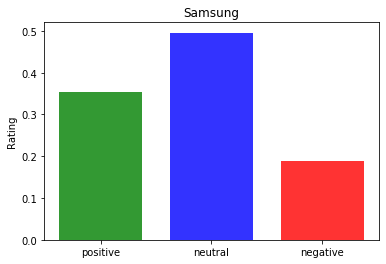

In [12]:
# No preprocessing of comments required as VADER can pick up sentiments from emohis, punctuation and capitalisation
sentiment_samsung=sentiment_score(youtube_samsung,'Samsung')

In [13]:
youtube_samsung.to_csv('./dataset/youtube_samsung_sentiment.csv', index = False)

## Sentiment over time

In [16]:
# Convert date to datetime format 
youtube_samsung['date']=pd.to_datetime(youtube_samsung['date'])
youtube_samsung.set_index(['date'],inplace=True)

In [17]:
youtube_samsung

,comments,sentiment
date,,
2020-04-13 20:35:50+00:00,😱😱😱so cool,0.3182
2020-04-13 18:07:07+00:00,Már bánom hogy megvettem! Retek szar exynos pr...,0.4738
2020-04-13 15:51:08+00:00,هاتف رائع,0.0000
2020-04-13 14:05:00+00:00,Whose watching this on an s20 ultra,0.0000
2020-04-13 09:42:06+00:00,samsung: ‘intelligent battery control’<br />ex...,0.0000
...,...,...
2020-02-11 20:06:31+00:00,5th,0.0000
2020-02-11 20:06:23+00:00,さわるのが楽しみ,0.0000
2020-02-11 20:06:21+00:00,I liked this phone,0.4215


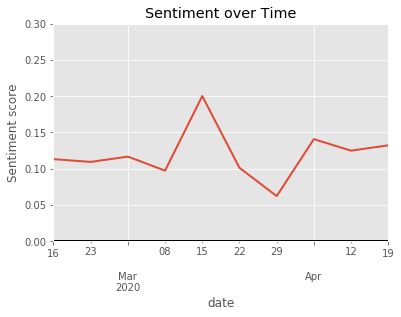

In [18]:
#Sentiments for Samsung S20 Ultra YouTube advertisenment video over time
import matplotlib
matplotlib.style.use('ggplot')

youtube_samsung['sentiment'].resample('W').mean().plot(title = "Sentiment over Time", lw=2, ylim = (0,0.3))
                            
plt.axhline(0, color = 'k', lw=2)
plt.xlabel('date')
plt.ylabel('Sentiment score')
plt.show()

While sentiment towards Samsung's S20 Ultra YouTube advertisement video did flucuate, it did not drop over time (Mar to Apr 2020). This means that the advertisement is still fresh and well received. This method could be deployed by marketers to track the 'freshness' of their advertisement and optimise the release of next advertisement video.

## Statistics for SamsungSingapore's YouTube channel

A company's YouTube channel can contain many videos/advertisement. YouTube API allows developers to access a channel and obtain statistics and comments on all the videos in a channel. This is a quick way to evaluate the popularity of the videos in a common channel.

In [98]:
# For this project, I am extracting 50 videos from Samsung Singapore's YouTube channel for analysis. 
# https://www.youtube.com/channel/UCG2D173IlWnQHUTS07ytGsw
def get_statistics(video_id):

    url = "https://www.googleapis.com/youtube/v3/videos"
    pms = {'key': API_KEY_YT, 'id': video_id, 'part':'contentDetails,statistics'}
    res = requests.get(url, params = pms)
    data = res.json()
    return(data)

def get_json(new_url, headers={}):
    resp = requests.get(new_url, headers=headers)
    data_dct = resp.json()
    return data_dct


def get_channel_videos(channel_id='UCG2D173IlWnQHUTS07ytGsw'):
    url = "https://www.googleapis.com/youtube/v3/search"
    vid_df = []
    pms = {'type': 'video', 'id' : id, 'key': API_KEY_YT, 'channelId': channel_id, 'part':'snippet', 'order':'viewCount','maxResults':50}
    res = requests.get(url, params = pms)
    print("Connection status: %s" % res)
    data = res.json()

    for video in data['items']:
        video_stats = get_statistics(video['id']['videoId'])
        video_id=(video['id']['videoId'])
        video_url = f"https://www.youtube.com/watch?v={video_id}"
        API_KEY=API_KEY_FB
        url = f"https://api.sharedcount.com/v1.0/?url={video_url}&apikey={API_KEY}"
        data = get_json(url)
        results_json = {
                'channelTitle' : video['snippet']['channelTitle'],
                'title' : video['snippet']['title'],
                'publishedAt' : video['snippet']['publishedAt'],
                'videoId' : video['id']['videoId'],
                'videoUrl' : video_url,
                'viewCount' : video_stats['items'][0]['statistics']['viewCount'],
                'likeCount' : video_stats['items'][0]['statistics']['likeCount'],
                'dislikeCount' : video_stats['items'][0]['statistics']['dislikeCount'],
                'FbShares' : data['Facebook']['share_count'],
            }
        vid_df.append(results_json)
        channel_df=pd.DataFrame(vid_df)
    
    return(channel_df)

In [99]:
# Get Samsung Singapore's YouTube channel video statistics
channel_samsung = get_channel_videos(channel_id='UCG2D173IlWnQHUTS07ytGsw')
channel_samsung.to_csv('./dataset/channel_samsung.csv', index = False)

Connection status: <Response [200]>


In [25]:
channel_samsung=pd.read_csv('./dataset/channel_samsung.csv')

In [26]:
channel_samsung.columns

Index(['channelTitle', 'title', 'publishedAt', 'videoId', 'videoUrl',
       'viewCount', 'likeCount', 'dislikeCount', 'FbShares'],
      dtype='object')

In [27]:
# Statistics on each video in the channel
channel_samsung.head()

,channelTitle,title,publishedAt,videoId,videoUrl,viewCount,likeCount,dislikeCount,FbShares
0,SamsungSingapore,Samsung Galaxy S9 | S9+ Launch TVC: The Camera...,2018-03-23T10:11:38.000Z,RZb9MKrRDXc,https://www.youtube.com/watch?v=RZb9MKrRDXc,2308478,85,23,1
1,SamsungSingapore,Galaxy A (2018) - Lets you be you,2018-02-09T04:36:50.000Z,GLWL8MhirwI,https://www.youtube.com/watch?v=GLWL8MhirwI,1506657,28,7,2
2,SamsungSingapore,Samsung Galaxy S10 - The next generation Galax...,2019-03-08T11:05:28.000Z,EfNQImeP6YU,https://www.youtube.com/watch?v=EfNQImeP6YU,1085096,212,139,11
3,SamsungSingapore,Samsung - Moments That Matter,2017-12-19T08:42:48.000Z,KYqTY_AL13Y,https://www.youtube.com/watch?v=KYqTY_AL13Y,1076514,19,7,6
4,SamsungSingapore,The Power to Progress,2018-08-01T06:43:57.000Z,YnUj-3H1yyk,https://www.youtube.com/watch?v=YnUj-3H1yyk,1046916,30,8,12


In [116]:
url = 'https://www.googleapis.com/youtube/v3/commentThreads'

channel_comment_samsung = []
page = ''

i = 0

for i in range(50):
    while True:
        pms = {'part': 'snippet', 'videoId' : channel_samsung['videoId'][i], 'maxResults' : 100, 'lang': 'en', 
               'key': API_KEY_YT, 'pageToken': page}
        res = requests.get(url, params = pms)
       
        print("Connection status: %s" % res)

        data = res.json()
        channel_comment_samsung.extend(data['items'])

        print("Just downloaded: %s, Total: %s" % (len(data['items']), len(channel_comment_samsung)))

        try:
            page = data['nextPageToken']
            print(channel_samsung['videoId'][i])
            i+=1
            print('\n')

        except:
            break

Connection status: <Response [200]>
Just downloaded: 2, Total: 2
Connection status: <Response [200]>
Just downloaded: 2, Total: 4
Connection status: <Response [200]>
Just downloaded: 24, Total: 28
Connection status: <Response [200]>
Just downloaded: 2, Total: 30
Connection status: <Response [200]>
Just downloaded: 4, Total: 34
Connection status: <Response [200]>
Just downloaded: 6, Total: 40
Connection status: <Response [200]>
Just downloaded: 9, Total: 49
Connection status: <Response [200]>
Just downloaded: 12, Total: 61
Connection status: <Response [200]>
Just downloaded: 13, Total: 74
Connection status: <Response [200]>
Just downloaded: 10, Total: 84
Connection status: <Response [200]>
Just downloaded: 3, Total: 87
Connection status: <Response [200]>
Just downloaded: 19, Total: 106
Connection status: <Response [200]>
Just downloaded: 7, Total: 113
Connection status: <Response [200]>
Just downloaded: 22, Total: 135
Connection status: <Response [200]>
Just downloaded: 24, Total: 159
C

In [135]:
# Extract comments on each video using videoIds
channel_samsung_comment = pd.DataFrame()

channel_samsung_comment['comments'] = [k['snippet']['topLevelComment']['snippet']['textDisplay'] for k in channel_comment_samsung]
channel_samsung_comment['date'] = [k['snippet']['topLevelComment']['snippet']['publishedAt'] for k in channel_comment_samsung]
channel_samsung_comment['videoId'] = [k['snippet']['topLevelComment']['snippet']['videoId'] for k in channel_comment_samsung]

channel_samsung_comment = channel_samsung_comment.set_index(['date'])
channel_samsung_comment.index = pd.to_datetime(channel_samsung_comment.index)

In [155]:
# check for null comments
channel_samsung_comment.isnull().sum()

comments    1
videoId     0
dtype: int64

In [158]:
# drop null comments
channel_samsung_comment.dropna(axis=0,inplace=True)

In [160]:
channel_samsung_comment.to_csv('./dataset/channel_samsung_comment.csv', index = False)

In [19]:
channel_samsung_comment=pd.read_csv('./dataset/channel_samsung_comment.csv')

In [20]:
# apply sentiment analysis to extracted comments. Text cleaning is not required.
channel_samsung_comment['sentiment'] = channel_samsung_comment['comments'].apply(lambda txt: sentiment.polarity_scores(txt)['compound'])

In [21]:
channel_samsung_comment.head()

,comments,videoId,sentiment
0,Guys the music is Get Stupid,RZb9MKrRDXc,-0.5267
1,tell me whats that music,RZb9MKrRDXc,0.0000
2,isnt concept this from an actual photographer,GLWL8MhirwI,0.0000
3,But why is this concept copied from someone el...,GLWL8MhirwI,0.4215
4,Why apple singapore disabled their comments thou?,EfNQImeP6YU,0.0000


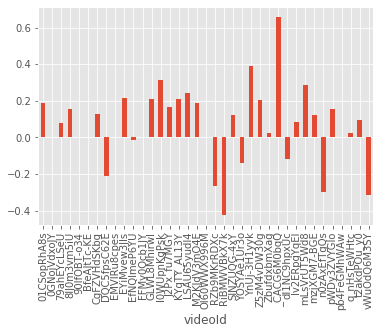

In [31]:
# Match comment sentiment to videoId
channel_samsung_comment.groupby('videoId')['sentiment'].mean().plot(kind="bar")

samsung_videoid_sentiment_mean = channel_samsung_comment.groupby('videoId')['sentiment'].mean()

Some Samsung advertisement videos are more well received than others. This can help marketers in improving advertisements.

In [32]:
samsung_videoid_sentiment_mean=samsung_videoid_sentiment_mean.to_frame()

In [33]:
# Merge YouTube statistics with YouTube comment sentiment
channel_samsung_sentiment=channel_samsung.join(samsung_videoid_sentiment_mean, on='videoId')

In [36]:
channel_samsung_sentiment.columns

Index(['channelTitle', 'title', 'publishedAt', 'videoId', 'videoUrl',
       'viewCount', 'likeCount', 'dislikeCount', 'FbShares', 'sentiment'],
      dtype='object')

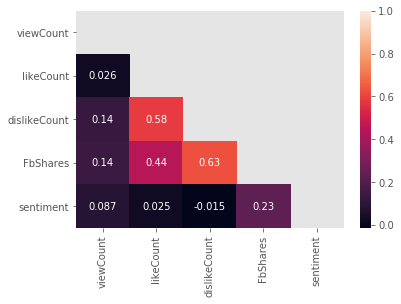

In [37]:
# Check the correlation between statistics (likes, dislikes, etc.) with sentiments
mask = np.triu(np.ones_like(channel_samsung_sentiment.corr(), dtype=np.bool))
sns.heatmap(channel_samsung_sentiment.corr(), mask=mask, annot=True)

Sentiments derived from YouTube comments are not strongly correlated to YouTube statistics (see heatmap above). This means that YouTube statistics are not reflective of YouTube comments' sentiments. While YouTube statistics are also metrics to assess consumers' likes and dislikes, sentiments derived from comments are equally valuable and may be explored further. For example, change in sentiments over time and topic modeling to understand the most common topic discussed by consumers.

In [227]:
channel_samsung_sentiment_final[['videoId', 'title', 'publishedAt','num_comment','sentiment']].sort_values(by=['sentiment'],ascending=False)

,videoId,title,publishedAt,num_comment,sentiment
22,_CACG6M0bqQ,Samsung Gear VR,2016-01-22T03:16:35.000Z,3.0,0.646867
3,KYqTY_AL13Y,Samsung - Moments That Matter,2017-12-19T08:42:48.000Z,2.0,0.391350
4,YnUj-3H1yyk,The Power to Progress,2018-08-01T06:43:57.000Z,4.0,0.373000
15,I0WUpnKgPsk,No messy cables with One Invisible Connection,2018-12-21T02:40:35.000Z,2.0,0.312450
26,mLsVrUT5Wd8,Samsung Official TVC: Gear S3,2016-11-11T12:10:16.000Z,7.0,0.256857
6,LSAU65yudl4,Samsung - Moments that Matter (2),2018-01-18T08:03:40.000Z,9.0,0.234444
1,GLWL8MhirwI,Galaxy A (2018) - Lets you be you,2018-02-09T04:36:50.000Z,2.0,0.210750
9,Z5zM4vDW30g,How to explore the world with Gear S3,2016-12-27T09:36:07.000Z,10.0,0.207170
17,M2KJdV3mO4E,Samsung QLED TV - No more burn-in,2019-01-03T04:22:46.000Z,4.0,0.190900
39,01CSopRhA8s,Galaxy S10+ NextGenBold: The Bold Fall,2019-05-21T07:36:54.000Z,2.0,0.190900


There are limitations to using sentiments. First, there are uneven number of comments on each video (see table above). Some videos may not have any comments or very few. The sentiment on the videos derived from the few number of comments may not be representative.